<a href="https://colab.research.google.com/github/Ananya-Jha-code/MNIST-classifier/blob/main/MNIST_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
##to display plot without plot.show
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
np.random.seed(0) 
##for constant result without being affected by randomness

#Load Data

In [4]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Shape of the dataset

In [5]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


60000 images for 28X28 dimensions and 10000 labels

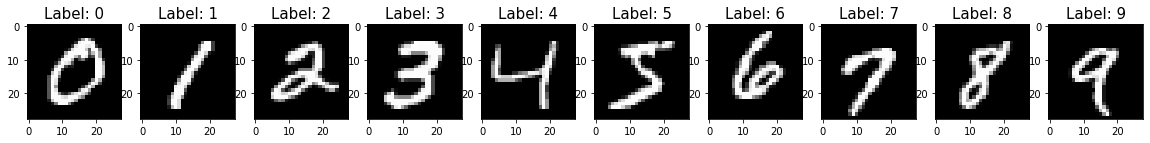

In [6]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))      #plot 1 row

for i in range(0, num_classes):
  ax[i].set_title("Label: {}".format(i), fontsize=15)
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  

dataset already balanced 

In [7]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


Labels are a continuous dataset. Convert to discrete to get one digit result 

In [8]:
y_train = keras.utils.all_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.all_utils.to_categorical(y_test, num_classes)

In [9]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


forms a vector of 10 elements where 1 represents the number and 0 fills the blanks

#Data Preparation

Normalization: probability of whites needed

In [10]:
# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [11]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
#-1 makes it one dimensional
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


#Model

In [12]:
model = Sequential()
#adding chain of layers
model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
#25% of the dataset will be deactivated during training which will prevent overfitting
model.add(Dense(units=10, activation='softmax'))
#softmax assigns probability for each class to be correct
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


#Training


In [13]:
batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 2s 9ms/step - loss: 0.6081 - accuracy: 0.8225
Epoch 2/10
118/118 [==============================] - 1s 9ms/step - loss: 0.2280 - accuracy: 0.9339
Epoch 3/10
118/118 [==============================] - 1s 9ms/step - loss: 0.1665 - accuracy: 0.9514
Epoch 4/10
118/118 [==============================] - 1s 9ms/step - loss: 0.1307 - accuracy: 0.9613
Epoch 5/10
118/118 [==============================] - 1s 9ms/step - loss: 0.1097 - accuracy: 0.9672
Epoch 6/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0922 - accuracy: 0.9725
Epoch 7/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0785 - accuracy: 0.9766
Epoch 8/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0691 - accuracy: 0.9786
Epoch 9/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0596 - accuracy: 0.9819
Epoch 10/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0531 - accuracy: 0.9838

#Evaluate

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0733 - accuracy: 0.9772
Test Loss: 0.07328207790851593, Test Accuracy: 0.9771999716758728


In [15]:
y_pred = model.predict(x_test)
#an array of all the prediction
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

[[4.9467707e-07 1.0835869e-05 9.8418452e-05 ... 9.9798489e-01
  2.0186415e-06 1.1873513e-04]
 [6.6183939e-06 5.0784298e-04 9.9948263e-01 ... 8.9993444e-09
  6.5282836e-07 4.6634024e-10]
 [6.5107965e-06 9.9906224e-01 1.1205111e-04 ... 2.3488476e-04
  1.8433329e-04 1.5631060e-05]
 ...
 [5.9758157e-11 4.3746218e-10 1.4243479e-09 ... 1.7599189e-07
  2.9111240e-08 1.9845906e-05]
 [1.7380618e-08 1.2686619e-08 4.7714083e-11 ... 8.3790921e-09
  1.6688189e-05 5.4200386e-09]
 [3.9815887e-08 5.7376909e-11 2.1925175e-09 ... 7.0925319e-13
  2.3430069e-10 7.0776163e-12]]
[7 2 1 ... 4 5 6]


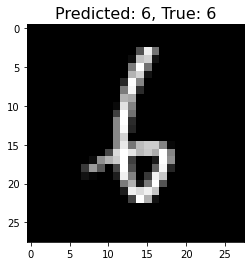

In [16]:
# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

#Confusion Matrix
network accuracy for every class

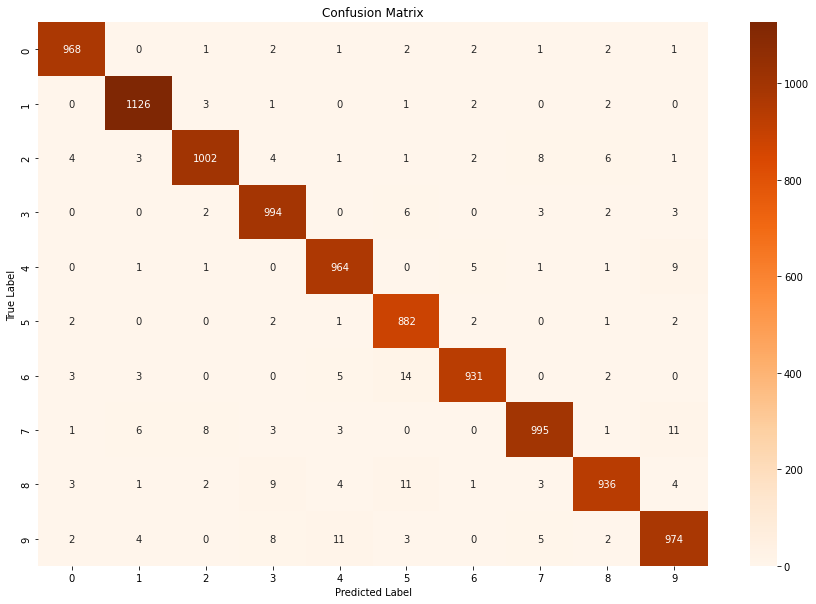

In [19]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Oranges")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

most of the classes are accurately classified

In [20]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [21]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

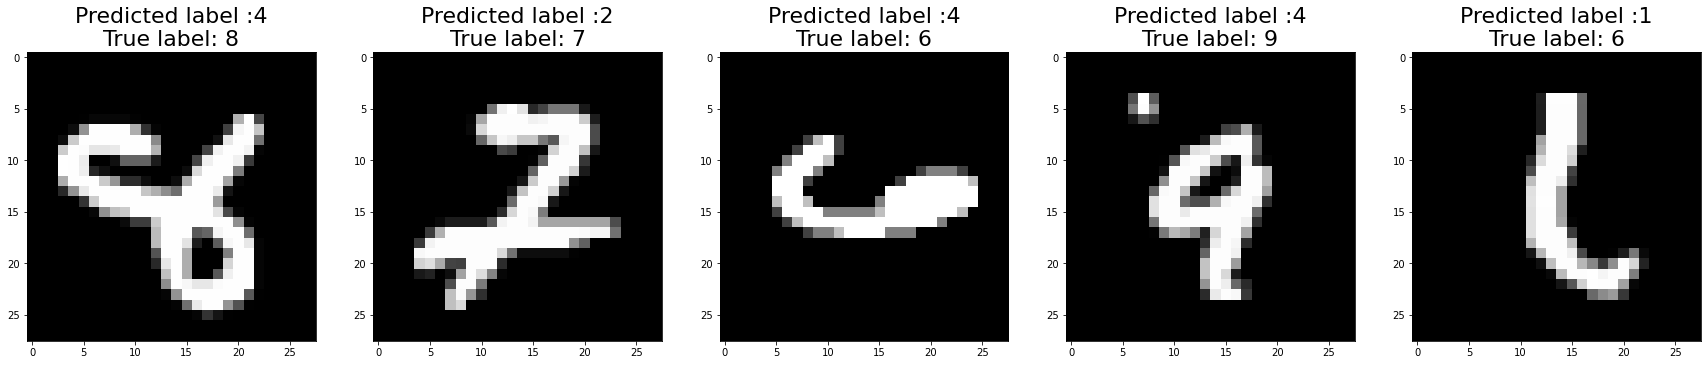

In [22]:
# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)